# Problem Statement 

Detect frauds and normal transactions in the credit card fraud detection dataset.

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Nice Read Blog - [Reference Link](https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# Labels present in the dataset
LABELS = ["Normal", "Fraud"]


In [2]:
# Read the creditcard.csv file contains transactions made by credit cards in September 2013 by European cardholders
df = pd.read_csv("creditcard.csv") 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## No Balancing Approach 
Here we use the data as is and make simple predictions of Fraud and Normal transaction by using the Random Forest Classification implementation in Python (Random Forest Classification is a classifier that is used as an example).

We start by separating our X and Y, the Y which is the predictor variable is the 'Class' column in the data frame.

Text(0, 0.5, 'Number of Occurances')

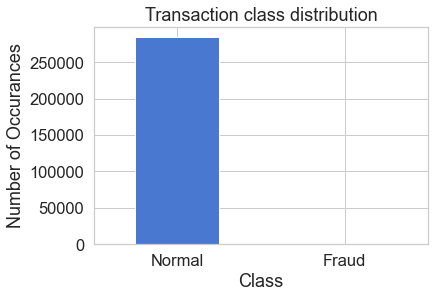

In [3]:
# Plot the distribution of Transactions without balancing the data
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

In [4]:
Y = df['Class'] # Dependent Feature: This column comprises of two classes "Fraud" = Class 1 and "Normal" = Class 0 Transactions
X = df.drop('Class', axis=1) # Independent Features

In [5]:
# Split the dataset into train and test split having a ratio of 80:20
x_train, x_val, y_train, y_val = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [6]:
# Train the Random Forest Classifier with the Training data (x_train and y_train)
clf_rf_no_sample = RandomForestClassifier()
clf_rf_no_sample.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
# Evaluate the model performance using the Accuracy Metric
acc_no_sample = accuracy_score(y_val, clf_rf_no_sample.predict(x_val))
print(acc_no_sample*100 , '%')

99.96488887328394 %


Accuracy is achieved. 
As you can see that our model is showing 99.96% accuracy, which is great ! 
Now, let's dig a little deeper to analyse how the model performed in classification for Fraud and Normal Transaction.


[[56866     3]
 [   17    76]]


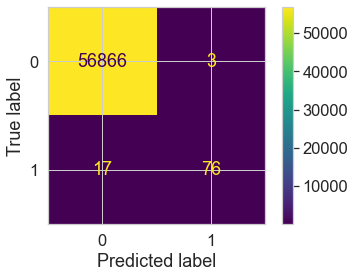

In [8]:
# Evaluate the model further using Confusion matrix
cf_no_sample = confusion_matrix(y_val, clf_rf_no_sample.predict(x_val), labels=clf_rf_no_sample.classes_)
print(cf_no_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_no_sample,
                            display_labels=clf_rf_no_sample.classes_)
disp.plot()
plt.show()

Where Class = 0 is Normal and Class = 1 is Fraud, thus as we are trying to measure how much our model is able to predict Fraud Transaction therefore, we are considering Fraud as our positive and Normal Transaction as our Negative. 

TN = True Normal Transaction = 56,866

TP = True Fraud Transaction = 76

FP = False Fraud Transaction = 3

FN = False Normal Transaction = 17

Hmm, Let's analyse a bit more. From the confusion matrix we can gather that there is not a lot of predictions of the frauds are not predicted. But the accuracy is 99.96% then what is the issue? The issue is the **Accuracy Paradox**. This happens in case of imbalanced datasets.


In [9]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_no_sample = precision_score(y_val, clf_rf_no_sample.predict(x_val))
print(precision_score_no_sample * 100, '%')

96.20253164556962 %


In [10]:
# Evaluate the mode for Recall Score
from sklearn.metrics import recall_score
recall_score_no_sample = recall_score(y_val, clf_rf_no_sample.predict(x_val))
print(recall_score_no_sample * 100, '%')

81.72043010752688 %


In [11]:
print("------No Sampling--------")
print('So, Accuracy = ' , acc_no_sample * 100, '%')
print('Precision score = ', precision_score_no_sample * 100, '%') 
print('Recall = ', recall_score_no_sample * 100, '%')

------No Sampling--------
So, Accuracy =  99.96488887328394 %
Precision score =  96.20253164556962 %
Recall =  81.72043010752688 %


In [16]:
TN = cf_no_sample[0][0]
TP = cf_no_sample[1][1]
FP = cf_no_sample[0][1]
FN = cf_no_sample[1][0]
print('True Normal Transactions:', TN)
print('True Fraud Transactions:', TP)
print('False Normal Transaction:', FN)
print('False Fraud Transactions:', FP)

# Calculate Accuracy
conf_accuracy_no_sample = (float (TP+TN) / float(TP + TN + FP + FN))

# Calculate Mis-Classification: What percentage of the values were mis-classified by the model
conf_misclassification_no_sample = 1 - conf_accuracy_no_sample

# Calculate the Sensitivity or Recall, i.e., Out of Normal transaction predicted by model how many actually resembles the Normal transaction in ground truth
conf_sensitivity_no_sample = (TP / float(TP + FN))

# Calculate the Specificity or True Negative Rate
conf_specificity_no_sample = (TN / float(TN + FP))

# Calculate Precision, i.e., How precisely model predicted the normal transactions
conf_precision_no_sample = (TP / float(TP + FP))

# Calculate f_1 score
conf_f1_no_sample = 2 * ((conf_precision_no_sample * conf_sensitivity_no_sample) / (conf_precision_no_sample + conf_sensitivity_no_sample))

print('-'*50)
print(f'Accuracy: {round(conf_accuracy_no_sample,2)}') 
print(f'Mis-Classification: {round(conf_misclassification_no_sample,2)}') 
print(f'Sensitivity: {round(conf_sensitivity_no_sample,2)}') 
print(f'Specificity: {round(conf_specificity_no_sample,2)}') 
print(f'Precision: {round(conf_precision_no_sample,2)}')
print(f'f_1 Score: {round(conf_f1_no_sample,2)}')

True Normal Transactions: 56866
True Fraud Transactions: 76
False Normal Transaction: 17
False Fraud Transactions: 3
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.82
Specificity: 1.0
Precision: 0.96
f_1 Score: 0.88


## Random Under Sampling Approach 
Here we use the data but in an under sampling appraoch. 
We reduce the number of samples for majority class to match the number of samples in the minority class.


In [17]:
df[df.Class == 0].shape # Normal Transactions

(284315, 31)

In [18]:
df[df.Class == 1].shape # Fraud Trnasactions

(492, 31)

In [19]:
# Transactions counts
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Number of Occurances')

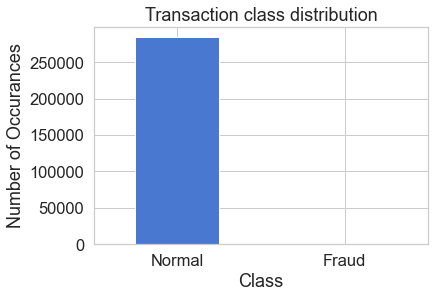

In [20]:
# Plot the distribution of Transactions without balancing the data
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

In [21]:
# Class count
count_class_0, count_class_1 = df.Class.value_counts()

# Divide classes in two dataframes
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

print(count_class_0, count_class_1)

284315 492


#### Undersampling Approach

In [22]:
# Random Undersampling where 492 records from majority class, i.e., class 0 or Normal transactions are selected
# to balance the class distribution
# 492 records => Same value of Fraud Transactions are present in the dataset
df_class_0 = df[df.Class == 0]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

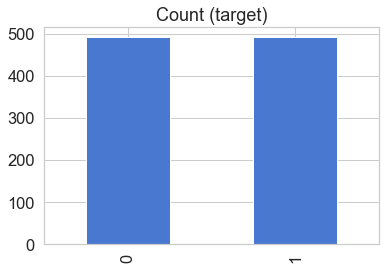

In [23]:
# Plot the distribution after performing Under Sampling
df_test_under.Class.value_counts().plot(kind='bar', title='Count (target)')

In [32]:
df_test_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37116,38812.0,1.101915,-0.745337,-0.067496,-0.612693,-0.651215,-0.760884,0.033901,-0.280300,-1.228594,...,-0.076844,-0.618586,0.018270,0.086908,0.250005,-0.519135,-0.021994,0.038578,160.00,0
251410,155338.0,2.168938,-1.134474,-0.963173,-1.242827,-0.523183,0.450947,-1.192127,0.236134,0.070776,...,-0.073298,-0.359216,0.278080,-0.411897,-0.413778,-0.469511,-0.008565,-0.053856,26.95,0
27162,34417.0,-1.548685,-0.002728,1.029141,0.155532,1.375283,-0.806486,0.848185,-0.270170,-0.603751,...,0.041918,0.199360,-0.447603,-0.383443,0.458914,-0.424931,0.124777,0.053675,129.90,0
212488,138880.0,1.854913,-0.674926,-0.794425,-0.156048,-0.206845,0.340293,-0.580525,0.119491,0.955014,...,0.272924,0.754234,0.042892,0.189734,-0.173060,0.068389,-0.008135,-0.035494,85.50,0
40093,40089.0,-0.540361,0.812037,0.650060,0.219368,-0.514130,-0.649262,0.614020,0.329768,-0.635054,...,0.242780,0.457650,0.243101,0.416682,-0.328483,0.298171,-0.126855,-0.025094,94.17,0


We can observe that now our dataset are balanced and we can train a Random Forest classifier with the balanced dataset

In [25]:
Y = df_test_under['Class'] # Dependent Feature: This column comprises of two classes "Fraud" = Class 1 and "Normal" = Class 0 Transactions
X = df_test_under.drop('Class', axis=1) # Independent Features

In [33]:
# Split the dataset into train and test split having a ratio of 80:20
x_train_under, x_val_under, y_train_under, y_val_under = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [34]:
# Train the Random Forest Classifier with the Training data (x_train and y_train)
clf_rf_under_sample = RandomForestClassifier()
clf_rf_under_sample.fit(x_train_under, y_train_under)

RandomForestClassifier()

In [35]:
# Evaluate the model performance using the Accuracy Metric
acc_under_sample = accuracy_score(y_val_under, clf_rf_under_sample.predict(x_val_under))
print(acc_under_sample*100 , '%')

94.9238578680203 %


Accuracy for Under Sampling is less, i.e., 94.92% as compared to Accuracy without Balancing

But Let's see if we achieve something more from it. 
Let's look at confusion matrix.

[[91  2]
 [ 8 96]]


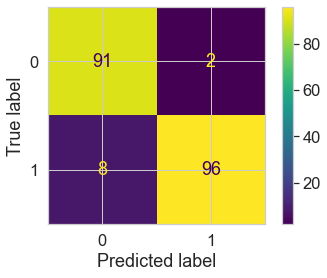

In [36]:
# Evaluate the model further using Confusion matrix
cf_under_sample = confusion_matrix(y_val_under, clf_rf_under_sample.predict(x_val_under), labels=clf_rf_under_sample.classes_)
print(cf_under_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_under_sample,
                            display_labels=clf_rf_under_sample.classes_)
disp.plot()
plt.show()

Where Class = 0 is Normal and Class = 1 is Fraud, thus as we are trying to measure how much our model is able to predict Fraud Transaction therefore, we are considering Fraud as our positive and Normal Transaction as our Negative. 

TN = True Normal Transaction = 92

TP = True Fraud Transaction = 95

FP = False Fraud Transaction = 1

FN = False Normal Transaction = 9

Let's analyse a bit more. From the confusion matrix we can gather that there is a considerable amount of predictions of the frauds and normal transaction.


In [41]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_under_sample = precision_score(y_val_under, clf_rf_under_sample.predict(x_val_under))
print(precision_score_under_sample * 100, '%')

97.95918367346938 %


In [42]:
# Evaluate the model for Recall Score
from sklearn.metrics import recall_score
recall_score_under_sample = recall_score(y_val, clf_rf_under_sample.predict(x_val))
print(recall_score_under_sample * 100, '%')

97.84946236559139 %


In [43]:
print("------Under Sampling--------")
print('So, Accuracy = ' , acc_under_sample * 100, '%')
print('Precision score = ', precision_score_under_sample * 100, '%') 
print('Recall = ', recall_score_under_sample * 100, '%')

------Under Sampling--------
So, Accuracy =  94.9238578680203 %
Precision score =  97.95918367346938 %
Recall =  97.84946236559139 %


In [44]:
TN = cf_under_sample[0][0]
TP = cf_under_sample[1][1]
FP = cf_under_sample[0][1]
FN = cf_under_sample[1][0]
print('True Normal Transactions:', TN)
print('True Fraud Transactions:', TP)
print('False Normal Transaction:', FN)
print('False Fraud Transactions:', FP)

# Calculate Accuracy
conf_accuracy_under_sample = (float (TP+TN) / float(TP + TN + FP + FN))

# Calculate Mis-Classification: What percentage of the values were mis-classified by the model
conf_misclassification_under_sample = 1 - conf_accuracy_under_sample

# Calculate the Sensitivity or Recall, i.e., Out of Normal transaction predicted by model how many actually resembles the Normal transaction in ground truth
conf_sensitivity_under_sample = (TP / float(TP + FN))

# Calculate the Specificity or True Negative Rate
conf_specificity_under_sample = (TN / float(TN + FP))

# Calculate Precision, i.e., How precisely model predicted the normal transactions
conf_precision_under_sample = (TP / float(TP + FP))

# Calculate f_1 score
conf_f1_under_sample = 2 * ((conf_precision_under_sample * conf_sensitivity_under_sample) / (conf_precision_under_sample + conf_sensitivity_under_sample))

print('-'*50)
print(f'Accuracy: {round(conf_accuracy_under_sample,2)}') 
print(f'Mis-Classification: {round(conf_misclassification_under_sample,2)}') 
print(f'Sensitivity: {round(conf_sensitivity_under_sample,2)}') 
print(f'Specificity: {round(conf_specificity_under_sample,2)}') 
print(f'Precision: {round(conf_precision_under_sample,2)}')
print(f'f_1 Score: {round(conf_f1_under_sample,2)}')

True Normal Transactions: 91
True Fraud Transactions: 96
False Normal Transaction: 8
False Fraud Transactions: 2
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 0.92
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.95


### To Conclude the performance: Under Sampling Approach > No Balancing


## Oversampling Approach using SMOTE
Now, We apply SMOTE on the minority class and we observe the changes that occur in the final predictions.

In [289]:
# Read the creditcard.csv file contains transactions made by credit cards in September 2013 by European cardholders
df = pd.read_csv("creditcard.csv") 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [290]:
Y = df['Class'] # Dependent Feature: This column comprises of two classes "Fraud" = Class 1 and "Normal" = Class 0 Transactions
X = df.drop('Class', axis=1) # Independent Features

Split the Dataset first into train and testing data and then perform the Oversampling approach

In [291]:
# Split the dataset into train and test split having a ratio of 80:20
x_train_over, x_val_over, y_train_over, y_val_over = train_test_split(X, Y,
                                                  test_size = .2,
                                                  random_state=12)

In [292]:
# Perform Oversampling on the training dataset using SMOTE on the minority class (Fraud transaction)
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train_over, y_train_over)
x_train_over = pd.DataFrame(x_train_res)
y_train_over = pd.DataFrame(y_train_res)

In [293]:
# Concatenate the oversampled dataset and observe the class distribution in the sampled data
frames = (x_train_over,y_train_over)
dataset = pd.concat(frames)
dataset.Class.value_counts()

0.0    227446
1.0    227446
Name: Class, dtype: int64

Text(0, 0.5, 'Number of Occurances')

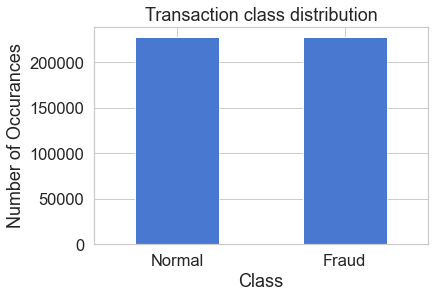

In [294]:
# Plot the distribution of Transactions without balancing the data
count_classes = pd.value_counts(dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

We can observe that the dataset is now balanced with 227446 transaction for Normal and Fraud Classes

In [295]:
# Train the Random Forest Classifier with the Training data (x_train and y_train)
clf_rf_over_sample = RandomForestClassifier()
clf_rf_over_sample.fit(x_train_over, y_train_over)

<ipython-input-295-ef6f853b22ac>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf_over_sample.fit(x_train_over, y_train_over)


RandomForestClassifier()

In [297]:
# Evaluate the model performance using the Accuracy Metric
acc_over_sample = accuracy_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(acc_over_sample * 100, '%')

99.95611109160492 %


Accuracy for Oversampling using SMOTE is 99.95% that is similar to the accuracy without balancing

But Let's see if we achieve something more from it. 
Let's look at confusion matrix.

[[56859    10]
 [   15    78]]


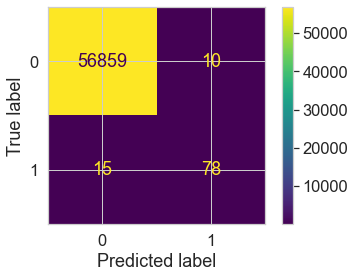

In [298]:
# Evaluate the model further using Confusion matrix
cf_over_sample=confusion_matrix(y_val_over, clf_rf_over_sample.predict(x_val_over), labels=clf_rf_over_sample.classes_)
print(cf_over_sample)

disp = ConfusionMatrixDisplay(confusion_matrix=cf_over_sample,
                            display_labels=clf_rf_over_sample.classes_)
disp.plot()
plt.show()

Where Class = 0 is Normal and Class = 1 is Fraud, thus as we are trying to measure how much our model is able to predict Fraud Transaction therefore, we are considering Fraud as our positive and Normal Transaction as our Negative. 

TN = True Normal Transaction = 78

TP = True Fraud Transaction = 56859

FP = False Fraud Transaction = 10

FN = False Normal Transaction = 15

From the confusion matrix we can gather that there is not a lot of predictions of the frauds are predicted correctly. But the accuracy is 99.95%. One of the reason for such an Accuracy Paradox situation might be the oversampling of minority class is performed in correctly. Further observing dataset after oversampling most of the rows are having NaN values. This might be one of the reason for bad Accuracy of the model.

In [299]:
# Evaluate the model for Precision Score
from sklearn.metrics import precision_score
precision_score_over_sample = precision_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(precision_score_over_sample*100, '%')

88.63636363636364 %


In [300]:
# Evaluate the model for Recall Score
from sklearn.metrics import recall_score
recall_score_over_sample = recall_score(y_val_over, clf_rf_over_sample.predict(x_val_over))
print(recall_score_over_sample*100, '%')

83.87096774193549 %


In [301]:
print("------Over Sampling--------")
print('So, Accuracy = ' , acc_over_sample*100, '%')
print('Precision score = ', precision_score_over_sample*100, '%') 
print('Recall = ', recall_score_over_sample*100, '%')

------Over Sampling--------
So, Accuracy =  99.95611109160492 %
Precision score =  88.63636363636364 %
Recall =  83.87096774193549 %


In [303]:
TN = cf_over_sample[0][0]
TP = cf_over_sample[1][1]
FP = cf_over_sample[0][1]
FN = cf_over_sample[1][0]
print('True Normal Transactions:', TN)
print('True Fraud Transactions:', TP)
print('False Normal Transaction:', FN)
print('False Fraud Transactions:', FP)

# Calculate Accuracy
conf_accuracy_over_sample = (float (TP+TN) / float(TP + TN + FP + FN))

# Calculate Mis-Classification: What percentage of the values were mis-classified by the model
conf_misclassification_over_sample = 1 - conf_accuracy_over_sample

# Calculate the Sensitivity or Recall, i.e., Out of Normal transaction predicted by model how many actually resembles the Normal transaction in ground truth
conf_sensitivity_over_sample = (TP / float(TP + FN))

# Calculate the Specificity or True Negative Rate
conf_specificity_over_sample = (TN / float(TN + FP))

# Calculate Precision, i.e., How precisely model predicted the normal transactions
conf_precision_over_sample = (TP / float(TP + FP))

# Calculate f_1 score
conf_f1_over_sample = 2 * ((conf_precision_over_sample * conf_sensitivity_over_sample) / (conf_precision_over_sample + conf_sensitivity_over_sample))

print('-'*50)
print(f'Accuracy: {round(conf_accuracy_over_sample,2)}') 
print(f'Mis-Classification: {round(conf_misclassification_over_sample,2)}') 
print(f'Sensitivity: {round(conf_sensitivity_over_sample,2)}') 
print(f'Specificity: {round(conf_specificity_over_sample,2)}') 
print(f'Precision: {round(conf_precision_over_sample,2)}')
print(f'f_1 Score: {round(conf_f1_over_sample,2)}')

True Normal Transactions: 56859
True Fraud Transactions: 78
False Normal Transaction: 15
False Fraud Transactions: 10
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.84
Specificity: 1.0
Precision: 0.89
f_1 Score: 0.86


In [305]:
print("------No Sampling--------")
print('So, Accuracy = ' , acc_no_sample*100, '%')
print('Precision score = ', precision_score_no_sample*100, '%') 
print('Recall = ', recall_score_no_sample*100, '%')

print("-------------------------")
print("------Under Sampling--------")
print('So, Accuracy = ' , acc_under_sample*100, '%')
print('Precision score = ', precision_score_under_sample*100, '%') 
print('Recall = ', recall_score_under_sample*100, '%')

print("-------------------------")
print("------Over Sampling--------")
print('So, Accuracy = ' , acc_over_sample*100, '%')
print('Precision score = ', precision_score_over_sample*100, '%') 
print('Recall = ', recall_score_over_sample*100, '%')
print("-------------------------")


------No Sampling--------
So, Accuracy =  99.96488887328394 %
Precision score =  97.40259740259741 %
Recall =  80.64516129032258 %
-------------------------
------Under Sampling--------
So, Accuracy =  94.9238578680203 %
Precision score =  98.95833333333334 %
Recall =  91.34615384615384 %
-------------------------
------Over Sampling--------
So, Accuracy =  99.95611109160492 %
Precision score =  88.63636363636364 %
Recall =  83.87096774193549 %
-------------------------


<table>
<tr>
<td>Measure</td>   
<td>No Sample</td>
<td>Random Under Sample</td>
<td>SMOTE Over Sample</td>

</tr>
<tr>
<td>Accuracy </td>
<td>99.96%</td>
<td>94.92%</td>
<td>99.95%</td>
</tr>    

<tr>
<td>Precision </td>
<td>97.40%</td>
<td>98.95%</td>
<td>91.34%</td>
</tr>    
<tr>
<td>Recall </td>
<td>80.64%</td>
<td>0.9840</td>
<td>83.87%</td>
</tr>  
</table>

### Note: 
Balancing must be performed after the train, test split. However, for Under Sampling one must make sure that the percentage of the imbalance of the dataset present in original dataset MUST be present in the training dataset.